#### Note:
The purpose of this notebook is to determine the ideal number of topics for the topic model. We will explore four approaches, visualize them and then pick one. The selected model then gets used in the next notebook to actually determine the main models. 

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

In [3]:
#Gensim Test
#import matplotlib.pyplot as plt
import gensim
import numpy as np

import spacy
import textacy
nlp = spacy.load('en_core_web_sm')
en = textacy.load_spacy_lang("en_core_web_sm")

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [6]:
df_sp = pd.read_csv('compressed_okcupid.csv')

In [7]:
texts = []
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
for i in df_sp['spacified']:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if (not i in en_stop and not str(i).isdigit() and len(str(i)) > 2 )]
    
    # stem tokens
    #stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stopped_tokens)
    

In [8]:
texts

[['would',
  'love',
  'think',
  'kind',
  'intellectual',
  'either',
  'dumbest',
  'smart',
  'guy',
  'smartest',
  'dumb',
  'guy',
  'say',
  'ican',
  'tell',
  'difference',
  'love',
  'talk',
  'ideas',
  'concepts',
  'iforge',
  'odd',
  'metaphors',
  'instead',
  'reciting',
  'cliches',
  'like',
  'thesimularities',
  'friend',
  'mine',
  'house',
  'underwatersalt',
  'mine',
  'favorite',
  'word',
  'salt',
  'way',
  'weird',
  'choice',
  'iknow',
  'things',
  'life',
  'better',
  'metaphors',
  'seek',
  'tomake',
  'little',
  'better',
  'everyday',
  'productively',
  'lazyway',
  'got',
  'tired',
  'tying',
  'shoes',
  'considered',
  'hiring',
  'five',
  'yearold',
  'would',
  'probably',
  'tie',
  'shoes',
  'decided',
  'toonly',
  'wear',
  'leather',
  'shoes',
  'dress',
  'shoes',
  'love',
  'really',
  'serious',
  'really',
  'deep',
  'conversations',
  'aboutreally',
  'silly',
  'stuff',
  'willing',
  'snap',
  'alight',
  'hearted',
  '

In [9]:
bigram = gensim.models.Phrases(texts)
texts = [bigram[line] for line in texts]

In [10]:
texts

[['would',
  'love',
  'think',
  'kind',
  'intellectual',
  'either',
  'dumbest',
  'smart',
  'guy',
  'smartest',
  'dumb',
  'guy',
  'say',
  'ican',
  'tell_difference',
  'love',
  'talk',
  'ideas',
  'concepts',
  'iforge',
  'odd',
  'metaphors',
  'instead',
  'reciting',
  'cliches',
  'like',
  'thesimularities',
  'friend_mine',
  'house',
  'underwatersalt',
  'mine',
  'favorite',
  'word',
  'salt',
  'way',
  'weird',
  'choice',
  'iknow',
  'things',
  'life',
  'better',
  'metaphors',
  'seek',
  'tomake',
  'little',
  'better',
  'everyday',
  'productively',
  'lazyway',
  'got_tired',
  'tying',
  'shoes',
  'considered',
  'hiring',
  'five',
  'yearold',
  'would_probably',
  'tie',
  'shoes',
  'decided',
  'toonly',
  'wear',
  'leather',
  'shoes',
  'dress',
  'shoes',
  'love',
  'really',
  'serious',
  'really',
  'deep_conversations',
  'aboutreally',
  'silly',
  'stuff',
  'willing',
  'snap',
  'alight',
  'hearted',
  'rant',
  'kiss',
  'funny

In [11]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [34]:
lda_testmodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [13]:
#tf_vectorizer = CountVectorizer(max_features=2000, stop_words='english', ngram_range=(1,3))
#print("Vectorizing text by word counts...")
#tf_text = tf_vectorizer.fit_transform(df_sp['spacified'])
#tmp = tf_text.get_shape()
#print("Our transformed text has", tmp[0], "rows and", tmp[1], "columns.")

In [14]:
#ntopics = 16
#how many top words we want to display for each topic
#nshow = 20

In [15]:
#model = LatentDirichletAllocation(n_components=ntopics, max_iter=10, 
                                  #learning_method='online', n_jobs=-1)
#print('Performing LDA on vectors. This may take a while...')
#lda = model.fit(tf_text)
#lda_topics = lda.components_
#print('Done!')

In [16]:
#pyLDAvis.sklearn.prepare(lda, tf_text, tf_vectorizer)

In [35]:
pyLDAvis.gensim.prepare(lda_testmodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.127777 -0.050878       1        1  30.657473
5      0.157267  0.063227       2        1  25.998819
2      0.072932  0.075810       3        1   9.059263
6      0.017011 -0.105914       4        1   8.271895
0      0.046147  0.013072       5        1   7.503243
7     -0.004454 -0.063795       6        1   5.484775
9     -0.057853  0.014357       7        1   3.470156
3     -0.184998  0.025564       8        1   3.282862
8     -0.087029  0.081338       9        1   3.255795
1     -0.086800 -0.052782      10        1   3.015721, topic_info=     Category          Freq             Term         Total  loglift  logprob
term                                                                        
46    Default  11909.000000             like  11909.000000  30.0000  30.0000
48    Default  10222.000000             love  10222.000000  29.0000  29.0000
108   Default   4081.000000            enjoy   4081.000000  28.0000  28.0000
281   Default   2601.000000             want   2601.000000  27.0000  27.0000
45    Default   7253.000000             life   7253.000000  26.0000  26.0000
356   Default   3405.000000              one   3405.000000  25.0000  25.0000
139   Default   6564.000000           people   6564.000000  24.0000  24.0000
278   Default   5243.000000             time   5243.000000  23.0000  23.0000
198   Default   4697.000000             also   4697.000000  22.0000  22.0000
1086  Default    779.000000            woman    779.000000  21.0000  21.0000
79    Default   3160.000000            think   3160.000000  20.0000  20.0000
306   Default   1812.000000             city   1812.000000  19.0000  19.0000
282   Default   2964.000000             well   2964.000000  18.0000  18.0000
288   Default   1670.000000            years   1670.000000  17.0000  17.0000
230   Default   4639.000000             good   4639.000000  16.0000  16.0000
625   Default   1111.000000          believe   1111.000000  15.0000  15.0000
3006  Default    723.000000            women    723.000000  14.0000  14.0000
91    Default   3484.000000             work   3484.000000  13.0000  13.0000
182   Default    868.000000           others    868.000000  12.0000  12.0000
704   Default   1148.000000           travel   1148.000000  11.0000  11.0000
1454  Default   1404.000000    san_francisco   1404.000000  10.0000  10.0000
177   Default    953.000000              man    953.000000   9.0000   9.0000
176   Default   2208.000000             live   2208.000000   8.0000   8.0000
354   Default   2340.000000              new   2340.000000   7.0000   7.0000
705   Default   1007.000000        traveling   1007.000000   6.0000   6.0000
1023  Default   1770.000000            world   1770.000000   5.0000   5.0000
169   Default   1019.000000              got   1019.000000   4.0000   4.0000
179   Default   2636.000000            music   2636.000000   3.0000   3.0000
175   Default   3039.000000             know   3039.000000   2.0000   2.0000
251   Default   1130.000000            moved   1130.000000   1.0000   1.0000
...       ...           ...              ...           ...      ...      ...
684   Topic10     45.661285           raised    350.697266   1.4627  -6.4999
45    Topic10    115.180206             life   7253.700195  -0.6414  -5.5747
139   Topic10    105.372864           people   6564.514160  -0.6306  -5.6637
182   Topic10     54.262383           others    868.209961   0.7287  -6.3273
198   Topic10     87.196983             also   4697.665039  -0.4853  -5.8530
779   Topic10     46.745884             name    637.410095   0.8886  -6.4764
281   Topic10     68.058334             want   2601.036377  -0.1420  -6.1008
115   Topic10     71.529518              fun   3919.411621  -0.5023  -6.0511
112   Topic10     52.546371             find   2179.479736  -0.2238  -6.3595
356   Topic10     56.237862              one   3405.150635  -0.6021  -6.291

In [18]:
#Find the number of topics for LDA with the most coherence
c_v = []
limit = range(1, 25)
for num_topics in limit:
    lm = LdaModel(corpus=corpus, num_topics=num_topics,
                  id2word=dictionary)
    cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary,
                       coherence='c_v')
    c_v.append(cm.get_coherence())

In [19]:
##Find the number of topics for LDA with the most coherence
c_v_lsi = []
limit = range(1, 25)
for num_topics in limit:
    ls = LsiModel(corpus=corpus, num_topics=num_topics,
                  id2word=dictionary)
    cm = CoherenceModel(model=ls, texts=texts, dictionary=dictionary,
                       coherence='c_v')
    c_v_lsi.append(cm.get_coherence())

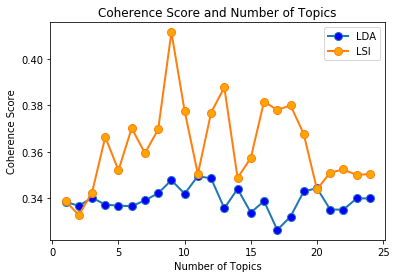

In [36]:
df=pd.DataFrame({'x': limit, 
                 'LDA': c_v, 
                 'LSI': c_v_lsi})
plt.plot( 'x', 'LDA', data=df, marker='o', markerfacecolor='blue', markersize=8, linewidth=2)
plt.plot( 'x', 'LSI', data=df, marker='o', markerfacecolor='orange', markersize=8, linewidth=2)
plt.xlabel('Number of Topics', fontsize=10)
plt.ylabel('Coherence Score', fontsize=10)
plt.title('Coherence Score and Number of Topics', fontsize=12)
plt.legend()
plt.savefig('coherence_square.png')

In [38]:
c_v_lsi[8]

0.41155284611148857

In [30]:
final_ls = LsiModel(corpus=corpus, num_topics=9,
                  id2word=dictionary)

In [41]:
final_lda=LdaModel(corpus=corpus, num_topics=25,random_state=2019
                  id2word=dictionary)

In [42]:
pyLDAvis.gensim.prepare(final_lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14     0.135667  0.020125       1        1  11.575875
6      0.122270  0.086244       2        1  11.053901
7      0.143574  0.011077       3        1  10.447782
22     0.121673 -0.101249       4        1   7.737236
5      0.098669  0.050399       5        1   7.717836
21     0.099881 -0.040420       6        1   6.220716
17     0.094023 -0.004195       7        1   4.562315
15     0.038679  0.063106       8        1   3.473292
4      0.028037 -0.059611       9        1   3.298379
19    -0.015072  0.078822      10        1   2.837455
8      0.028860 -0.018636      11        1   2.725430
3     -0.006929  0.059270      12        1   2.569188
13     0.018059 -0.054920      13        1   2.504935
11    -0.031102  0.019501      14        1   2.450428
1     -0.121358  0.105085      15        1   2.406201
9     -0.014759 -0.129245      16        1   2.388301
16    -0.015237 -0.051506      17        1   2.381347
12    -0.059475  0.061956      18        1   2.346188
20    -0.062458  0.055332      19        1   2.063367
2     -0.022269 -0.026998      20        1   1.863310
23    -0.077552  0.025876      21        1   1.571572
0     -0.130331 -0.104787      22        1   1.546567
10    -0.139990 -0.018530      23        1   1.492113
24    -0.128675  0.022367      24        1   1.399265
18    -0.104184 -0.049062      25        1   1.367004, topic_info=      Category          Freq            Term         Total  loglift  logprob
term                                                                        
48     Default  10000.000000            love  10000.000000  30.0000  30.0000
46     Default  11858.000000            like  11858.000000  29.0000  29.0000
179    Default   2554.000000           music   2554.000000  28.0000  28.0000
139    Default   6430.000000          people   6430.000000  27.0000  27.0000
306    Default   1735.000000            city   1735.000000  26.0000  26.0000
45     Default   7377.000000            life   7377.000000  25.0000  25.0000
78     Default   5129.000000          things   5129.000000  24.0000  24.0000
278    Default   5189.000000            time   5189.000000  23.0000  23.0000
59     Default   3675.000000          really   3675.000000  22.0000  22.0000
115    Default   3806.000000             fun   3806.000000  21.0000  21.0000
108    Default   4090.000000           enjoy   4090.000000  20.0000  20.0000
986    Default   2374.000000         looking   2374.000000  19.0000  19.0000
1454   Default   1341.000000   san_francisco   1341.000000  18.0000  18.0000
251    Default   1088.000000           moved   1088.000000  17.0000  17.0000
28     Default   2018.000000             guy   2018.000000  16.0000  16.0000
223    Default   3351.000000         friends   3351.000000  15.0000  15.0000
356    Default   3376.000000             one   3376.000000  14.0000  14.0000
91     Default   3405.000000            work   3405.000000  13.0000  13.0000
175    Default   2962.000000            know   2962.000000  12.0000  12.0000
198    Default   4693.000000            also   4693.000000  11.0000  11.0000
227    Default   3307.000000             get   3307.000000  10.0000  10.0000
288    Default   1683.000000           years   1683.000000   9.0000   9.0000
300    Default   1291.000000        bay_area   1291.000000   8.0000   8.0000
166    Default    890.000000      easy_going    890.000000   7.0000   7.0000
230    Default   4553.000000            good   4553.000000   6.0000   6.0000
193    Default   2122.000000             try   2122.000000   5.0000   5.0000
112    Default   2153.000000            find   2153.000000   4.0000   4.0000
292    Default   2587.000000          always   2587.000000   3.0000   3.0000
487    Default    862.000000          sports    862.000000   2.0000   2.0000
1121   Default   1481.000000         working   1481.000000   1.0000   1.0000
...        ...           ...       

In [39]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [40]:
hdpmodel.show_topics()

[(0,
  '0.012*like + 0.011*love + 0.007*life + 0.007*people + 0.005*time + 0.005*things + 0.005*also + 0.005*good + 0.004*enjoy + 0.004*one + 0.004*really + 0.004*get + 0.004*work + 0.003*fun + 0.003*friends + 0.003*think + 0.003*know + 0.003*well + 0.003*want + 0.003*going'),
 (1,
  '0.012*like + 0.011*love + 0.008*life + 0.007*people + 0.006*time + 0.005*things + 0.005*enjoy + 0.005*also + 0.005*good + 0.004*really + 0.004*fun + 0.004*work + 0.003*get + 0.003*friends + 0.003*one + 0.003*think + 0.003*well + 0.003*know + 0.003*going + 0.003*looking'),
 (2,
  '0.011*like + 0.010*love + 0.007*life + 0.006*people + 0.005*time + 0.005*things + 0.004*also + 0.004*good + 0.004*enjoy + 0.004*fun + 0.003*work + 0.003*friends + 0.003*want + 0.003*really + 0.003*one + 0.003*get + 0.003*know + 0.003*well + 0.003*always + 0.003*going'),
 (3,
  '0.006*like + 0.005*love + 0.004*people + 0.003*life + 0.002*good + 0.002*time + 0.002*work + 0.002*things + 0.002*really + 0.002*also + 0.002*fun + 0.002*